In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import fpl_function as fpl
sns.set_theme()

In [2]:
df = pd.read_excel('players_pre_season.xlsx')

In [3]:
df.head()

,now_cost,points_per_game,selected_by_percent,status,team,total_points,web_name,minutes,goals_scored,assists,...,penalties_order,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,starts_per_90,clean_sheets_per_90,position
0,55,2.2,0.1,a,Arsenal,24,Fábio Vieira,290,1,3,...,4.0,0.39,0.0,0.20,0.59,0.57,0.62,0.62,0.31,Midfielder
1,70,3.1,2.2,a,Arsenal,85,G.Jesus,1470,4,7,...,NaN,0.38,0.0,0.20,0.58,0.71,0.67,1.04,0.67,Forward
2,60,4.1,11.8,a,Arsenal,149,Gabriel,3042,3,1,...,NaN,0.13,0.0,0.02,0.15,0.77,0.77,1.01,0.47,Defender
3,80,4.9,14.1,a,Arsenal,180,Havertz,2627,13,10,...,3.0,0.42,0.0,0.13,0.55,0.72,0.75,1.03,0.55,Forward
4,40,0.0,0.2,a,Arsenal,0,Hein,0,0,0,...,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Goalkeeper


In [4]:
df.columns

Index(['now_cost', 'points_per_game', 'selected_by_percent', 'status', 'team',
       'total_points', 'web_name', 'minutes', 'goals_scored', 'assists',
       'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved',
       'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus',
       'bps', 'influence', 'creativity', 'threat', 'ict_index', 'starts',
       'expected_goals', 'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded', 'corners_and_indirect_freekicks_order',
       'direct_freekicks_order', 'penalties_order', 'expected_goals_per_90',
       'saves_per_90', 'expected_assists_per_90',
       'expected_goal_involvements_per_90', 'expected_goals_conceded_per_90',
       'goals_conceded_per_90', 'starts_per_90', 'clean_sheets_per_90',
       'position'],
      dtype='object')

In [5]:
df['status'].value_counts()

a    542
u     25
i     17
s      3
d      3
Name: status, dtype: int64

In [6]:
df.drop(df[df['status'] == 'u'].index, inplace=True)

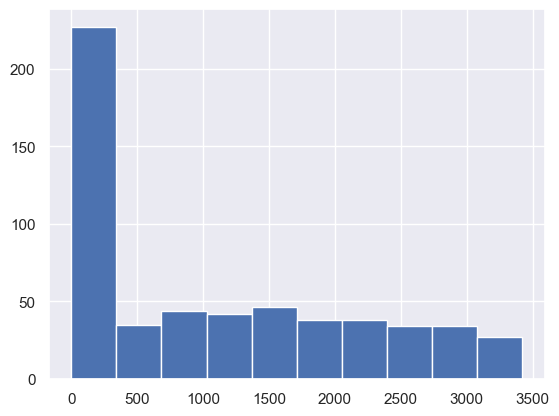

In [7]:
plt.hist(df['minutes'])
plt.show()

In [8]:
df['minutes'].describe()

count     565.000000
mean     1083.145133
std      1088.000921
min         0.000000
25%         0.000000
50%       839.000000
75%      1979.000000
max      3420.000000
Name: minutes, dtype: float64

In [9]:
df = df.drop(df[df['minutes'] == 0].index)

In [10]:
df['minutes'].describe()

count     393.000000
mean     1557.193384
std       981.364782
min         1.000000
25%       770.000000
50%      1516.000000
75%      2341.000000
max      3420.000000
Name: minutes, dtype: float64

In [11]:
#drop players in bottom 25% of minutes
df = df.drop(df[df['minutes'] <= 711].index)

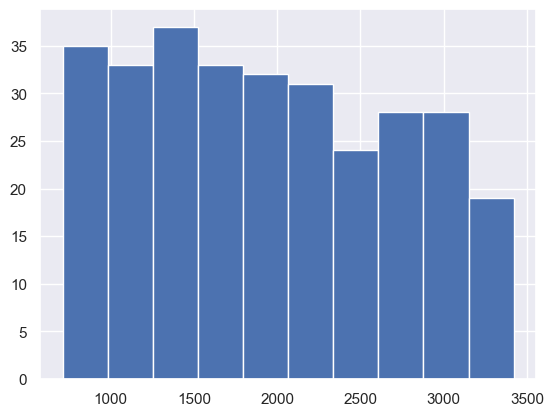

In [12]:
plt.hist(df['minutes'])
plt.show()

In [13]:
df['now_cost'] = df['now_cost']/10

#create points per million (cost) column (ppm)
df['ppm'] = round(df['total_points']/df['now_cost'], 2)

#create expected goal involvements vs actual goal involvements column
df['gi_vs_xgi'] = df['goals_scored'] + df['assists'] - df['expected_goal_involvements']

df['goal_involvements'] = df['goals_scored'] + df['assists']

df['points_per_minute'] = df['total_points']/df['minutes']

df['gc_vs_xgc'] = df['goals_conceded'] - df['expected_goals_conceded']

df['percent_of_season_played'] = np.round(df['minutes']/(38*90) * 100, 2)

In [14]:
df.loc[df['position'] == 'Forward'].corr()['total_points'].sort_values(ascending=False).head(10)

total_points         1.000000
goal_involvements    0.975447
influence            0.972399
bps                  0.967931
ict_index            0.943408
goals_scored         0.927928
points_per_game      0.919548
bonus                0.905255
threat               0.898683
minutes              0.888587
Name: total_points, dtype: float64

In [15]:
df.loc[df['position'] == 'Midfielder'].corr()['total_points'].sort_values(ascending=False).head(10)

total_points                  1.000000
ict_index                     0.953843
goal_involvements             0.947868
influence                     0.932727
expected_goal_involvements    0.916801
bps                           0.907096
points_per_game               0.898716
goals_scored                  0.897852
bonus                         0.893029
ppm                           0.882816
Name: total_points, dtype: float64

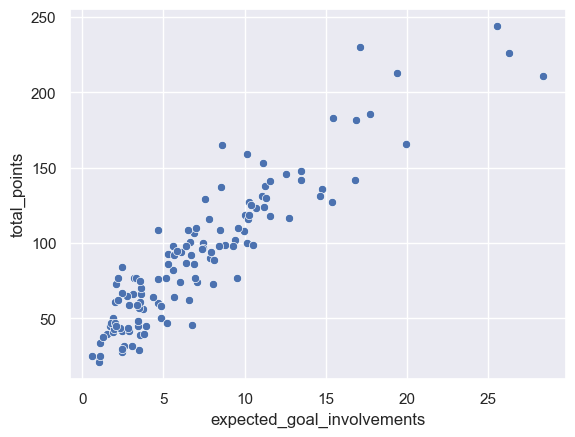

In [16]:
sns.scatterplot(data=df.loc[df['position'] == 'Midfielder'][['expected_goal_involvements', 'total_points']], x='expected_goal_involvements', y='total_points')
plt.show()

In [17]:
df.loc[df['position'] == 'Defender'].corr()['total_points'].sort_values(ascending=False).head(10)

total_points                1.000000
ppm                         0.963547
bps                         0.939098
clean_sheets                0.899021
ict_index                   0.822891
starts                      0.807520
minutes                     0.807370
percent_of_season_played    0.807365
influence                   0.806421
points_per_game             0.790956
Name: total_points, dtype: float64

In [18]:
df.loc[df['position'] == 'Goalkeeper'].corr()['total_points'].sort_values(ascending=False).head(10)

total_points                1.000000
ppm                         0.983946
bps                         0.952174
starts                      0.941105
minutes                     0.939912
percent_of_season_played    0.939905
clean_sheets                0.839608
ict_index                   0.782849
influence                   0.782375
bonus                       0.739416
Name: total_points, dtype: float64

In [19]:
fpl.top_players(df, 'Goalkeeper', 'total_points', False, 10)

KeyError: "['next_match', 'next_5_avg_FDRs'] not in index"

In [ ]:
fpl.top_players(df, 'Defender', 'total_points', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,clean_sheets,goals_conceded,expected_goals_conceded,gc_vs_xgc,total_points
22,White,Arsenal,6.5,11.8,776,2987,87.34,28.00,0.060931,4,5,9,4.93,4.07,0.15,18,26,24.95,1.05,182
17,Saliba,Arsenal,6.0,39.5,781,3420,100.00,27.33,0.047953,2,1,3,2.60,0.40,0.06,18,29,28.32,0.68,164
2,Gabriel,Arsenal,6.0,11.8,676,3042,88.95,24.83,0.048981,3,1,4,5.13,-1.13,0.15,16,26,26.18,-0.18,149
514,Pedro Porro,Spurs,5.5,30.3,720,3090,90.35,24.73,0.044013,3,8,11,9.10,1.90,0.27,7,54,58.42,-4.42,136
224,Branthwaite,Everton,5.0,11.6,621,3116,91.11,24.80,0.039795,3,1,4,2.91,1.09,0.09,12,44,49.43,-5.43,124
362,Gvardiol,Man City,6.0,32.9,549,2327,68.04,20.50,0.052858,4,2,6,5.23,0.77,0.20,9,23,23.88,-0.88,123
375,Walker,Man City,5.5,9.3,633,2766,80.88,22.36,0.044469,0,5,5,3.60,1.40,0.11,10,29,28.61,0.39,123
429,Schär,Newcastle,5.5,7.5,629,3055,89.33,22.36,0.040262,4,3,7,3.87,3.13,0.11,9,58,58.64,-0.64,123
323,Alexander-Arnold,Liverpool,7.0,23.8,590,2153,62.95,17.43,0.056665,3,5,8,8.62,-0.62,0.36,8,28,27.96,0.04,122
195,Andersen,Crystal Palace,4.5,22.7,679,3416,99.88,26.89,0.035422,2,3,5,3.83,1.17,0.10,10,58,53.71,4.29,121


In [ ]:
fpl.top_players(df, 'Defender', 'expected_goal_involvements_per_90', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,clean_sheets,goals_conceded,expected_goals_conceded,gc_vs_xgc,total_points
323,Alexander-Arnold,Liverpool,7.0,23.8,590,2153,62.95,17.43,0.056665,3,5,8,8.62,-0.62,0.36,8,28,27.96,0.04,122
432,Trippier,Newcastle,6.0,13.9,589,2235,65.35,18.50,0.049664,1,10,11,7.62,3.38,0.31,6,43,40.26,2.74,111
31,Cash,Aston Villa,4.5,3.0,337,2138,62.51,14.22,0.029935,2,2,4,6.88,-2.88,0.29,3,36,36.78,-0.78,64
514,Pedro Porro,Spurs,5.5,30.3,720,3090,90.35,24.73,0.044013,3,8,11,9.10,1.90,0.27,7,54,58.42,-4.42,136
362,Gvardiol,Man City,6.0,32.9,549,2327,68.04,20.50,0.052858,4,2,6,5.23,0.77,0.20,9,23,23.88,-0.88,123
555,Aït-Nouri,Wolves,4.5,3.2,365,2327,68.04,17.11,0.033090,2,3,5,4.93,0.07,0.19,3,43,45.79,-2.79,77
524,Udogie,Spurs,5.0,4.6,402,2391,69.91,15.80,0.033041,2,3,5,4.78,0.22,0.18,5,43,48.70,-5.70,79
35,Digne,Aston Villa,4.5,2.0,420,2405,70.32,18.89,0.035343,1,4,5,4.48,0.52,0.17,6,41,41.65,-0.65,85
80,Senesi,Bournemouth,5.0,1.1,486,2239,65.47,20.40,0.045556,4,5,9,4.25,4.75,0.17,6,44,40.83,3.17,102
122,Dunk,Brighton,4.5,4.2,567,2869,83.89,19.78,0.031021,3,1,4,5.38,-1.38,0.17,5,53,49.76,3.24,89


In [ ]:
fpl.top_players(df, 'Midfielder', 'expected_goal_involvements_per_90', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
340,M.Salah,Liverpool,12.5,35.6,621,2531,74.01,16.88,0.083366,18,12,30,28.36,1.64,1.01,211
184,Palmer,Chelsea,10.5,44.5,844,2617,76.52,23.24,0.093237,22,13,35,25.52,9.48,0.88,244
16,Saka,Arsenal,10.0,26.6,776,2922,85.44,22.60,0.077344,16,12,28,26.29,1.71,0.81,226
101,Mbeumo,Brentford,7.0,6.1,364,1957,57.22,18.14,0.064895,9,7,16,15.37,0.63,0.71,127
203,Eze,Crystal Palace,7.0,33.1,490,2054,60.06,19.43,0.066212,11,5,16,14.78,1.22,0.65,136
522,Son,Spurs,10.0,11.1,707,2934,85.79,21.30,0.072597,17,10,27,19.36,7.64,0.59,213
27,Bailey,Aston Villa,6.5,4.4,482,2063,60.32,22.77,0.071740,10,11,21,13.46,7.54,0.58,148
379,B.Fernandes,Man Utd,8.5,14.9,729,3118,91.17,19.53,0.053239,10,9,19,19.96,-0.96,0.58,166
339,Luis Díaz,Liverpool,7.5,7.2,413,2625,76.75,18.93,0.054095,8,7,15,16.81,-1.81,0.57,142
510,Johnson,Spurs,6.5,1.4,397,2317,67.75,20.15,0.056539,5,12,17,14.65,2.35,0.57,131


In [ ]:
fpl.top_players(df, 'Midfielder', 'bps', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
360,Foden,Man City,9.5,24.2,866,2860,83.63,24.21,0.080420,19,8,27,17.12,9.88,0.54,230
184,Palmer,Chelsea,10.5,44.5,844,2617,76.52,23.24,0.093237,22,13,35,25.52,9.48,0.88,244
16,Saka,Arsenal,10.0,26.6,776,2922,85.44,22.60,0.077344,16,12,28,26.29,1.71,0.81,226
15,Rice,Arsenal,6.5,5.9,744,3225,94.30,25.38,0.051163,7,9,16,8.62,7.38,0.24,165
372,Rodrigo,Man City,6.5,7.2,737,2931,85.70,24.46,0.054248,8,10,18,10.14,7.86,0.31,159
379,B.Fernandes,Man Utd,8.5,14.9,729,3118,91.17,19.53,0.053239,10,9,19,19.96,-0.96,0.58,166
549,Ward-Prowse,West Ham,6.5,1.9,708,3000,87.72,22.46,0.048667,7,7,14,12.53,1.47,0.38,146
522,Son,Spurs,10.0,11.1,707,2934,85.79,21.30,0.072597,17,10,27,19.36,7.64,0.59,213
12,Ødegaard,Arsenal,8.5,17.0,703,3098,90.58,21.88,0.060039,8,11,19,17.69,1.31,0.52,186
408,Bruno G.,Newcastle,6.5,3.1,691,3264,95.44,23.54,0.046875,7,9,16,11.11,4.89,0.31,153


In [ ]:
fpl.top_players(df, 'Forward', 'expected_goal_involvements_per_90', False, 10)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
363,Haaland,Man City,15.0,44.3,792,2553,74.65,14.47,0.084998,27,8,35,31.75,3.25,1.12,217
415,Isak,Newcastle,8.5,55.6,645,2253,65.88,20.24,0.076343,21,4,25,22.90,2.10,0.92,172
328,Darwin,Liverpool,7.5,7.2,397,2033,59.44,17.60,0.064929,11,11,22,20.60,1.40,0.91,132
131,João Pedro,Brighton,5.5,16.8,406,2037,59.56,18.91,0.051055,9,3,12,16.65,-4.65,0.74,104
182,N.Jackson,Chelsea,7.5,2.6,479,2801,81.90,18.93,0.050696,14,6,20,21.14,-1.14,0.68,142
364,J.Alvarez,Man City,7.0,1.9,662,2644,77.31,22.57,0.059758,11,11,22,19.35,2.65,0.65,158
225,Calvert-Lewin,Everton,6.0,1.6,259,2166,63.33,16.83,0.046630,7,3,10,14.43,-4.43,0.60,101
83,Solanke,Bournemouth,7.5,19.4,560,3325,97.22,23.33,0.052632,19,3,22,21.75,0.25,0.59,175
57,Watkins,Aston Villa,9.0,46.2,752,3222,94.21,25.33,0.070764,19,18,37,20.76,16.24,0.58,228
3,Havertz,Arsenal,8.0,14.1,515,2627,76.81,22.50,0.068519,13,10,23,16.23,6.77,0.55,180


In [ ]:
fpl.top_players_by_cost(df, 'Midfielder', 6.5, 'expected_goal_involvements_per_90', 10)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
27,Bailey,Aston Villa,6.5,4.4,482,2063,60.32,22.77,0.071740,10,11,21,13.46,7.54,0.58,148
510,Johnson,Spurs,6.5,1.4,397,2317,67.75,20.15,0.056539,5,12,17,14.65,2.35,0.57,131
572,Hee Chan,Wolves,6.5,1.3,334,2116,61.87,19.23,0.059074,12,3,15,10.37,4.63,0.44,125
354,Bernardo,Man City,6.5,3.1,604,2576,75.32,21.69,0.054736,6,9,15,11.59,3.41,0.40,141
385,Garnacho,Man Utd,6.5,12.9,372,2564,74.97,20.15,0.051092,7,7,14,11.04,2.96,0.39,131
348,Szoboszlai,Liverpool,6.5,2.4,437,2102,61.46,15.23,0.047098,3,4,7,8.77,-1.77,0.38,99
449,Gibbs-White,Nott'm Forest,6.5,6.4,563,3156,92.28,21.85,0.044994,5,12,17,13.44,3.56,0.38,142
549,Ward-Prowse,West Ham,6.5,1.9,708,3000,87.72,22.46,0.048667,7,7,14,12.53,1.47,0.38,146
511,Kulusevski,Spurs,6.5,2.4,463,2759,80.67,20.00,0.047119,8,3,11,11.31,-0.31,0.37,130
372,Rodrigo,Man City,6.5,7.2,737,2931,85.70,24.46,0.054248,8,10,18,10.14,7.86,0.31,159


In [ ]:
fpl.top_players_by_cost(df, 'Midfielder', 5.5, 'expected_goal_involvements_per_90', 10)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
448,Elanga,Nott'm Forest,5.5,2.8,386,2424,70.88,21.64,0.049092,5,9,14,10.24,3.76,0.38,119
247,Andreas,Fulham,5.5,4.5,459,2611,76.35,23.09,0.048640,3,9,12,10.24,1.76,0.36,127
254,Iwobi,Fulham,5.5,0.5,425,2331,68.16,18.55,0.043758,5,2,7,9.43,-2.43,0.36,102
222,A.Doucoure,Everton,5.5,0.6,335,2632,76.96,21.09,0.044073,7,3,10,10.21,-0.21,0.35,116
235,McNeil,Everton,5.5,0.9,515,2891,84.53,22.55,0.042892,3,8,11,11.16,-0.16,0.35,124
84,Tavernier,Bournemouth,5.5,0.2,324,2118,61.93,16.18,0.042021,3,4,7,8.12,-1.12,0.34,89
47,McGinn,Aston Villa,5.5,2.1,502,3000,87.72,21.64,0.039667,6,5,11,10.00,1.00,0.30,119
115,Adingra,Brighton,5.5,0.6,330,2220,64.91,17.64,0.043694,6,1,7,7.45,-0.45,0.30,97
79,Semenyo,Bournemouth,5.5,1.2,363,2099,61.37,19.45,0.050977,8,4,12,6.87,5.13,0.29,107
229,Harrison,Everton,5.5,0.2,292,2212,64.68,16.73,0.041591,3,3,6,6.70,-0.70,0.27,92


In [ ]:
fpl.top_players_by_cost(df, 'Midfielder', 4.5, 'expected_goal_involvements_per_90', 10, minutes_req=False)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,goals_scored,assists,goal_involvements,expected_goal_involvements,gi_vs_xgi,expected_goal_involvements_per_90,total_points
458,Sangaré,Nott'm Forest,4.5,1.6,89,1031,30.15,5.56,0.024248,0,0,0,1.07,-1.07,0.09,25


In [ ]:
fpl.top_players_by_cost(df, 'Goalkeeper', 4.5, 'expected_goals_conceded', 10, asc=True)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,clean_sheets,saves,goals_conceded,expected_goals_conceded,gc_vs_xgc,total_points
74,Neto,Bournemouth,4.5,2.6,592,2880,84.21,24.44,0.038194,7,113,55,49.66,5.34,110
93,Flekken,Brentford,4.5,13.9,685,3285,96.05,26.44,0.036225,7,115,63,54.01,8.99,119
532,Areola,West Ham,4.5,11.1,598,2700,78.95,25.78,0.042963,4,138,53,54.72,-1.72,116
576,José Sá,Wolves,4.5,2.8,622,3037,88.80,23.78,0.035232,4,134,58,59.38,-1.38,107
540,Foderingham,West Ham,4.5,0.2,531,2648,77.43,15.56,0.026435,1,133,79,62.03,16.97,70


In [ ]:
fpl.top_players_by_cost(df, 'Goalkeeper', 4.5, 'expected_goals_conceded', 10, asc=True, minutes_req=False)

,web_name,team,now_cost,selected_by_percent,bps,minutes,percent_of_season_played,ppm,points_per_minute,clean_sheets,saves,goals_conceded,expected_goals_conceded,gc_vs_xgc,total_points
337,Kelleher,Liverpool,4.5,0.4,198,900,26.32,7.56,0.037778,2,28,11,10.33,0.67,34
294,Muric,Ipswich,4.5,0.5,241,900,26.32,10.44,0.052222,0,64,16,20.43,-4.43,47
459,Sels,Nott'm Forest,4.5,1.0,206,1440,42.11,7.56,0.023611,1,37,27,20.50,6.50,34
187,Sánchez,Chelsea,4.5,4.2,317,1433,41.90,13.11,0.041172,3,53,25,23.72,1.28,59
144,Steele,Brighton,4.5,0.5,300,1530,44.74,9.33,0.027451,2,43,34,24.86,9.14,42
205,Henderson,Crystal Palace,4.5,8.6,293,1620,47.37,10.67,0.029630,4,58,30,26.47,3.53,48
208,Johnstone,Crystal Palace,4.5,0.7,310,1796,52.51,15.11,0.037862,6,41,27,27.17,-0.17,68
148,Verbruggen,Brighton,4.5,2.1,417,1890,55.26,15.11,0.035979,4,65,28,31.60,-3.60,68
185,Petrović,Chelsea,4.5,1.3,414,1986,58.07,15.78,0.035750,5,75,38,34.93,3.07,71
410,Dúbravka,Newcastle,4.5,1.4,426,1984,58.01,16.67,0.037802,4,88,42,44.34,-2.34,75
